In [74]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from sklearn.model_selection import train_test_split

In [75]:
#Ház ár legenerálása
#Egy mérethez egy árat számítunk


X_training = []
y_training = []
header = ["size"]

for i in range(800):
    
    price = 0
    
    size = random.randint(20,99)+random.randint(0,10)/10

    price += ((math.sqrt(size)*10+0.3*(size/10)))
    

    X_training.append([size])
    y_training.append(price)
    
X_train = []
y_train = []

X_test = []
y_test = []

#Felosztjuk az adatokat 
X_train, X_test, y_train, y_test = train_test_split(X_training, y_training, test_size=0.2) # 80% training and 20% testing data


In [76]:
#Sorba rendezzük az adathalmazt a méret alapján növekvően

for i in range(len(X_train)):
    temp = i
    for j in range(i,len(X_train)):
        if(X_train[j]<X_train[temp]):
            temp = j
    if(temp != i):
        tmp = X_train[i]
        X_train[i] = X_train[temp]
        X_train[temp] = tmp
        
        tmp = y_train[i]
        y_train[i] = y_train[temp]
        y_train[temp] = tmp

for i in range(len(X_test)):
    temp = i
    for j in range(i,len(X_test)):
        if(X_test[j]<X_test[temp]):
            temp = j
    if(temp != i):
        tmp = X_test[i]
        X_test[i] = X_test[temp]
        X_test[temp] = tmp
        
        tmp = y_test[i]
        y_test[i] = y_test[temp]
        y_test[temp] = tmp



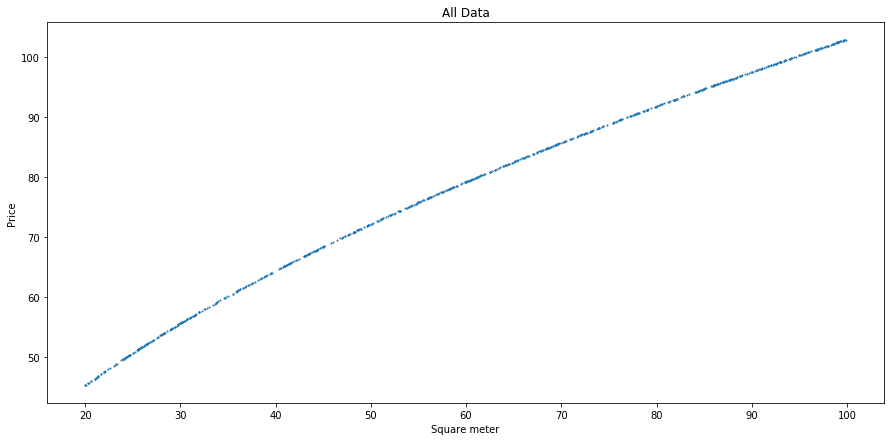

In [77]:
# visualize data set
plt.rcParams["figure.figsize"] = (15,7)
plt.scatter(X_training,y_training,s=1)

plt.xlabel("Square meter")
plt.ylabel("Price")
plt.title("All Data")

plt.show()

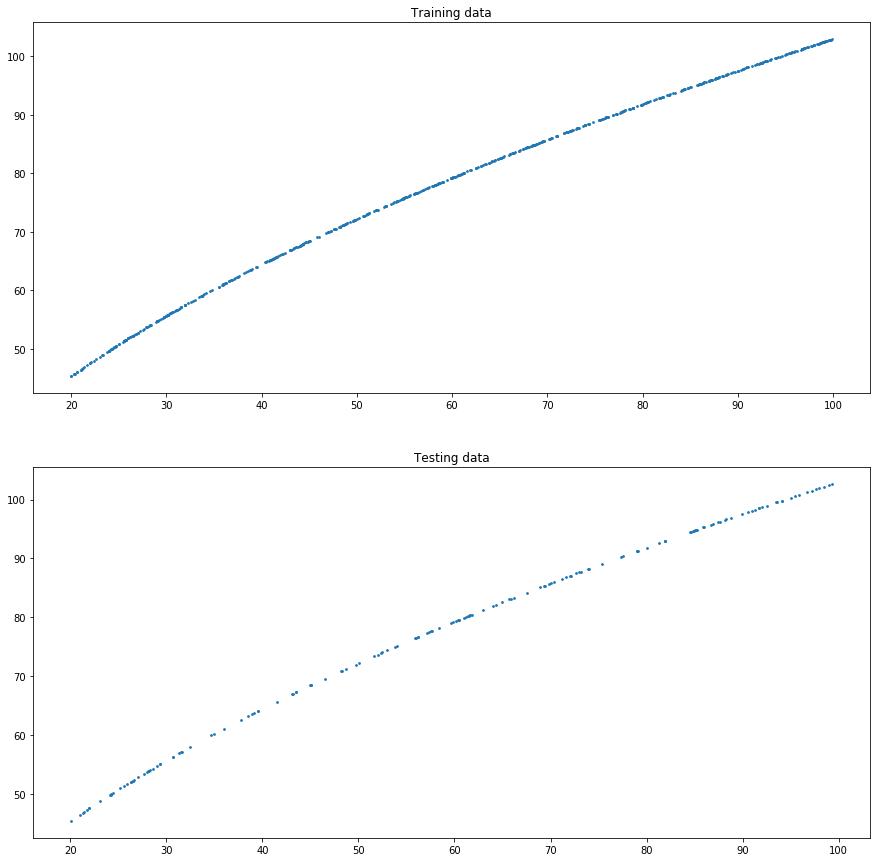

In [78]:
figure ,axis = plt.subplots(2,1 , figsize=(15, 15))

axis[0].scatter(X_train,y_train,s=3)
axis[0].set_title("Training data")


axis[1].scatter(X_test,y_test,s=3)
axis[1].set_title("Testing data")


plt.show()

In [79]:
class Tree:
    def __init__(self,X,feature_names,labels):
        
        self.X = X
        self.num_of_nodes = 0
        self.currentsplit = 0
        self.split_result = 0
        self.feature_names = feature_names #coloum names
        self.labels = labels#y
        self.catagories = set(labels)
        self.nodes = []
        self.leaf = 0
        

In [80]:
class Node:
    def __init__(self,labels,X,feature_ids):
        
        self.split_result = 0
        self.split = 0 #which column / which feature id
        self.feature_ids = feature_ids
        self.labels = labels
        self.X = X
        self.nodes = []
        
        self.leaf = 0 #true or false

In [81]:
def get_features(X,labels,column,split_value):#return splited data

    #Itt az adatokat mindig kettő felé osztjuk
    
    features = [ X[i][column] for i in range(len(X)) ]
  
    sub_labels = [] 
    sub_label = [labels[x] for x in range(len(features)) if features[x]<split_value]
    sub_X = [X[x] for x in range(len(features)) if features[x]<split_value]
    sub_labels.append([sub_label,sub_X,column])
    
    sub_label = [labels[x] for x in range(len(features)) if features[x]>=split_value]
    sub_X = [X[x] for x in range(len(features)) if features[x]>=split_value]
    sub_labels.append([sub_label,sub_X,column])
        
    return sub_labels

In [82]:
def calculate_mse(data):
   
    mean = sum(data)/len(data)
    
    variance = 0
    
    for i in data:
        variance += (i-mean)**2
    
    
    return variance/len(data)
    

In [83]:
def calculate_split_mse(X,labels,column,split_value):
    
    variance_sum = 0
    
    sub_labels = get_features(X,labels,column,split_value) 
    
    for i in sub_labels:

        if(len(i[0]) == 0):
            return -1
        variance_sum += calculate_mse(i[0])

  
    return variance_sum

In [84]:
def find_best_split(X,labels,feature_ids):
    
    lowest_v = -1
    split = 0
    split_value = 0
    V = 0 
    
    features = 0 
    svalue = 0

    for i in feature_ids:
        
            features = [ X[j][i] for j in range(len(X)) ] 

            for k in range(0,len(features)-1,2): 

                svalue = (features[k]+features[k+1])/2
                V = calculate_split_mse(X,labels,i,svalue)
                
                if(lowest_v == -1):
                    lowest_v = V
                    split_value = svalue
                    largest_v = V
                    split = i
                
                if(V<lowest_v):

                    split_value = svalue
                    lowest_v = V
                    split = i

    
    return split,split_value

In [85]:
def build_tree(X,feature_ids,labels,leaf_size,var):
    
    #Két felé bontjuk az adatokat úgy hogy a legkisseb mse kapjuk
    
    split = 0 
    sub_nodes = []

    split,split_value = find_best_split(X,labels,feature_ids)
    
    node_labels = get_features(X,labels,split,split_value)    
    
    for i in node_labels:
        node = Node(i[0],i[1],feature_ids)
        node.split = split
        node.split_result = split_value
        
        
        #Ha egy bizonyos MSE érték alá megyünk vagy elértünk egy bizonyos elemszámot akkor a node-ot leaf-nek nyilvánítjuk
        if(len(node.labels) <= leaf_size or calculate_mse(node.labels)<var):
            node.leaf = 1
            
        else:
            node.leaf = 0
        sub_nodes.append(node)
    
    if(sub_nodes[0].leaf == 1 and sub_nodes[1].leaf == 1):
        return sub_nodes
    else:
        for node in sub_nodes:

            if(node.leaf == 0):

                node.nodes = build_tree(node.X,node.feature_ids,node.labels,leaf_size,var)


    return sub_nodes   

In [86]:
def inicialize(X,feature_names,labels,leaf_size,var):
    
    
    feature_ids = [x for x in range(len(feature_names))]
    tree = Tree(X,feature_names,labels)
    tree.nodes = build_tree(X,feature_ids,labels,leaf_size,var)
    return tree

In [87]:
#build_tree(training_data,header,labels)
forest = []
bottom = 1
top = 15
#Különböző MSE határokkal építjuk fel a fát
for i in range(bottom,top):
    print("-------------------------------------------------------")
    print("Iteration: %d"%(i))
    tree = inicialize(X_train,header,y_train,5,i)
    forest.append(tree)

-------------------------------------------------------
Iteration: 1
-------------------------------------------------------
Iteration: 2
-------------------------------------------------------
Iteration: 3
-------------------------------------------------------
Iteration: 4
-------------------------------------------------------
Iteration: 5
-------------------------------------------------------
Iteration: 6
-------------------------------------------------------
Iteration: 7
-------------------------------------------------------
Iteration: 8
-------------------------------------------------------
Iteration: 9
-------------------------------------------------------
Iteration: 10
-------------------------------------------------------
Iteration: 11
-------------------------------------------------------
Iteration: 12
-------------------------------------------------------
Iteration: 13
-------------------------------------------------------
Iteration: 14


In [88]:
def print_tree(node,num):
    for i in node.nodes:
        if(i.leaf != 1):
            print_tree(i,num+1)
        else:
            print(len(i.labels))
   

In [89]:
print_tree(forest[4],0)
#Egy fa leveleinek elemszáma
#Nem egyenlő az előre megadott határtól így tudjuk hogy az MSE szerint döntött így

19
46
62
29
51
32
93
96
59
60
93


In [90]:

def predict(node,value):

    if(node.leaf == 1):
        p = sum(node.labels)/len(node.labels)
        return p
    else:
        if (node.nodes[0].split_result<value):
            
            p=predict(node.nodes[1],value)
            return p
        else:
            p=predict(node.nodes[0],value)
            return p
        


In [91]:
#Kiszámítjuk a teszt és a training data alapján az error mértékét
#Valamint a test adat alapján összehasonlítjuk az eredménnyel

diff = []
difference = []

for i in forest:
    d = []
    error = 0
    for j in range(len(X_test)): 

        p = predict(i,X_test[j][0])
        error += y_test[j]-p
        d.append(p)
    
    diff.append(d)
    difference.append(error)

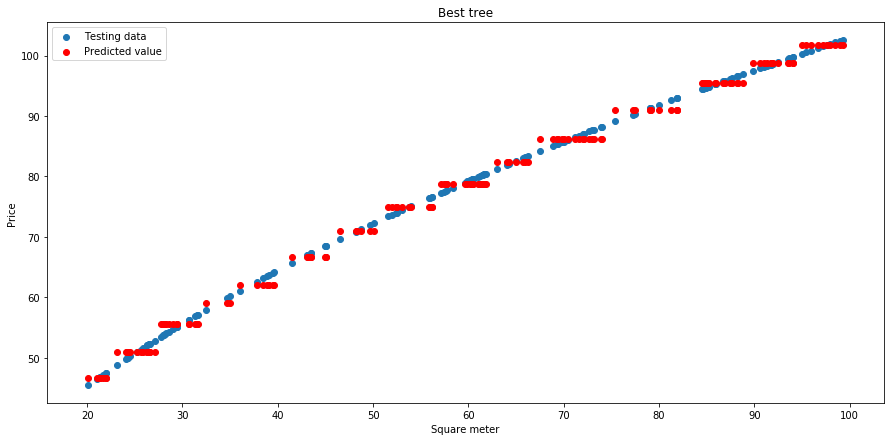

In [105]:
plt.rcParams["figure.figsize"] = (15,7)
plt.scatter(X_test,y_test)
plt.scatter(X_test,diff[1],c="r")
plt.legend(["Testing data" , "Predicted value"])

plt.xlabel("Square meter")
plt.ylabel("Price")
plt.title("Best tree")

plt.show()

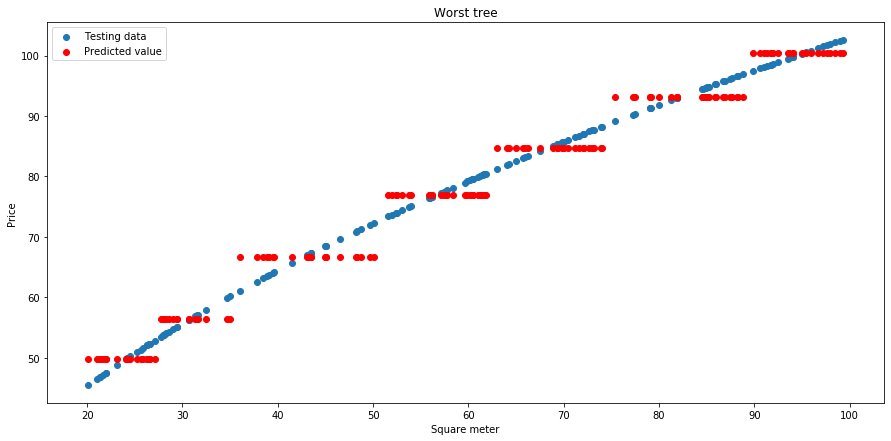

In [106]:
plt.rcParams["figure.figsize"] = (15,7)
plt.scatter(X_test,y_test,)
plt.scatter(X_test,diff[-1],c="r")
plt.legend(["Testing data" , "Predicted value"])
plt.xlabel("Square meter")
plt.ylabel("Price")
plt.title("Worst tree")

plt.show()

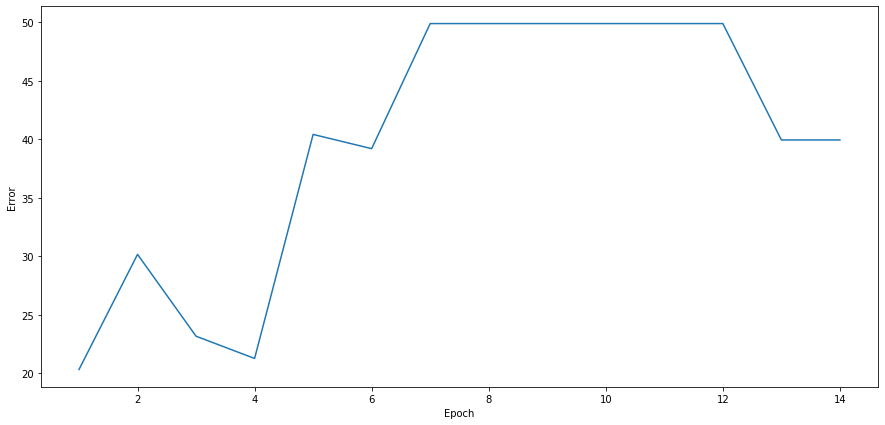

In [94]:

#Error mértéke a MSE határáról függően

x = [x for x in range(bottom,top)]

plt.rcParams["figure.figsize"] = (15,7)
plt.plot(x,difference,)

plt.xlabel("TREE")
plt.ylabel("Error")


plt.show()